In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

df=pd.read_csv('train_brainwave1.csv')
#test_data=pd.read_csv('test_brainwave1.csv')
df.head(10)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...
5,Tr-6,8/2/2016,Mortgage,"Loan modification,collection,foreclosure",NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...
6,Tr-7,3/26/2017,Credit reporting,Incorrect information on credit report,NaN,3/26/2017,Closed with explanation,No,J'ai été victime d'une fraude d'identité et j'...
7,Tr-8,10/15/2016,Bank account or service,Problems caused by my funds being low,Company has responded to the consumer and the ...,10/15/2016,Closed with explanation,No,"Je suis en train de faire faillite et, par con..."
8,Tr-9,1/18/2016,Debt collection,Cont'd attempts collect debt not owed,NaN,1/18/2016,Closed with explanation,Yes,Una agencia de cobranza me hizo adulterar de q...
9,Tr-10,8/17/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,8/17/2015,Closed with non-monetary relief,No,"Le XXXX / XXXX / 2015, j'ai reçu une réponse d..."


In [2]:
df.isnull().sum()

Complaint-ID                      0
Date-received                     0
Transaction-Type                  0
Complaint-reason                  0
Company-response              22506
Date-sent-to-company              0
Complaint-Status                  0
Consumer-disputes              7698
Consumer-complaint-summary        0
dtype: int64

In [3]:
df["Complaint-Status"].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed', 'Closed with monetary relief', 'Untimely response'],
      dtype=object)

# replacing nans for Closed with non monetary relief

In [4]:
df["Complaint-Status"].unique()
ls=[]
count=-1
for i in df["Complaint-Status"]:
    count+=1
    if i == "Closed with non-monetary relief":
        ls.append(count)

In [5]:
c=0
s="nan"
rep_s="Company has responded to the consumer and the CFPB and chooses not to provide a public response"
for i in ls:
    if s == str(df["Company-response"].iloc[i]):
        df["Company-response"].iloc[i]=rep_s
        
        
df["Company-response"].iloc[6054]

'Company has responded to the consumer and the CFPB and chooses not to provide a public response'

# replacing nans for Closed with explanation

In [6]:
ls=[]
count=-1
for i in df["Complaint-Status"]:
    count+=1
    if i == "Closed with explanation":
        ls.append(count)

In [7]:
ls1=[]
count=0
for i in ls:
    ls1.append(df["Company-response"].iloc[i])
for i in ls1:
    if "nan"==str(i):
        count+=1
print(count)

18696


In [8]:
s="nan"
rep_s="Company has responded to the consumer and the CFPB and chooses not to provide a public response"
rep_s2="Company chooses not to provide a public response"
c=0
for i in ls:
    if s == str(df["Company-response"].iloc[i]):
        c+=1
        if c<=9348: ## half the number of nans
            df["Company-response"].iloc[i]=rep_s
        else:
            df["Company-response"].iloc[i]=rep_s2

# replacing nans for Closed with monetary relief

In [9]:
ls=[]
count=-1
for i in df["Complaint-Status"]:
    count+=1
    if i == "Closed with monetary relief":
        ls.append(count)

In [10]:
c=0
s="nan"
rep_s="Company has responded to the consumer and the CFPB and chooses not to provide a public response"
for i in ls:
    if s == str(df["Company-response"].iloc[i]):
        c+=1

In [11]:
c=0
s="nan"
rep_s="Company has responded to the consumer and the CFPB and chooses not to provide a public response"
for i in ls:
    if s == str(df["Company-response"].iloc[i]):  ## nans replaced
        df["Company-response"].iloc[i]=rep_s

# replacing nans for Closed

In [12]:
ls=[]
count=-1
for i in df["Complaint-Status"]:
    count+=1
    if i == "Closed":
        ls.append(count)

In [13]:
c=0
s="nan"
rep_s="Company can't verify or dispute the facts in the complaint"
for i in ls:
    if s == str(df["Company-response"].iloc[i]):  ## nans replaced
        df["Company-response"].iloc[i]=rep_s

# replacing nans for Untimely Response

In [14]:
ls=[]
count=-1
for i in df["Complaint-Status"]:
    count+=1
    if i == "Untimely response":
        ls.append(count)

In [15]:
c=0
s="nan"
rep_s="Company believes complaint caused principally by actions of third party outside the control or direction of the companyt"
for i in ls:
    if s == str(df["Company-response"].iloc[i]):  ## nans replaced
        df["Company-response"].iloc[i]=rep_s
        c+=1


# replacing nans for Consumer Disputes

In [16]:
ls=[]
count=-1
for i in df["Consumer-disputes"]:
    count+=1
    if str(i)=="nan":
        ls.append(count)

In [17]:
c=0
s="nan"
rep_s="No"
for i in ls:
    if s == str(df["Consumer-disputes"].iloc[i]):  ## nans replaced
        df["Consumer-disputes"].iloc[i]=rep_s

# Selecting only those rows whose complaint-summary is in english

In [18]:
# Problem 1 : Translation APIs
from langdetect import detect

count=0
ls=[]
for i in range(0,43266):
    
    if detect(str(df["Consumer-complaint-summary"][i]))=='en':
        count+=1
        ls.append(i)
df = df.iloc[ls]        
print(count)

27771


In [19]:
from io import StringIO
col = ['Complaint-Status', 'Consumer-complaint-summary','Company-response','Consumer-disputes','Transaction-Type']
df = df[col]
df = df[pd.notnull(df['Consumer-complaint-summary'])]
df.columns = ['Complaint-Status', 'Consumer_complaint_summary','Company_response','Consumer_disputes','Transaction_Type']
df['category_id'] = df['Complaint-Status'].factorize()[0]
category_id_df = df[['Complaint-Status', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Complaint-Status']].values)
df.head()


,Complaint-Status,Consumer_complaint_summary,Company_response,Consumer_disputes,Transaction_Type,category_id
3,Closed with explanation,"The loan was paid in XXXX XXXX. In XXXX, 4 yea...",Company believes it acted appropriately as aut...,No,Debt collection,0
5,Closed with explanation,The owner of my original mortgage filed for ba...,Company has responded to the consumer and the ...,Yes,Mortgage,0
10,Closed with explanation,"My mortgage provider, United Wholesale Mortgag...",Company has responded to the consumer and the ...,No,Mortgage,0
11,Closed with explanation,My boyfriend and I bought a XXXX sofa and we h...,Company has responded to the consumer and the ...,No,Credit card,0
13,Closed with explanation,Both accounts below are settled and closed. Yo...,Company chooses not to provide a public response,No,Credit reporting,0


In [20]:
df.isnull().sum()

Complaint-Status              0
Consumer_complaint_summary    0
Company_response              0
Consumer_disputes             0
Transaction_Type              0
category_id                   0
dtype: int64

In [21]:
df = df.head(10000) # Problem 2 : Cell no.23  giving memory error with more than 20000 samples

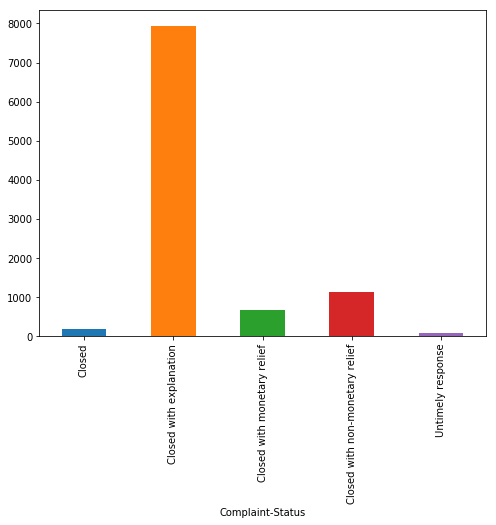

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Complaint-Status').Consumer_complaint_summary.count().plot.bar(ylim=0)
plt.show()

# Considering only complaint- summary

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features1 = tfidf.fit_transform(df.Consumer_complaint_summary).toarray()
labels = df.category_id
features1.shape

(10000, 26766)

In [24]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for comp_sts, category_id in sorted(category_to_id.items()):
    features1_chi2 = chi2(features1, labels == category_id)
    indices = np.argsort(features1_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(comp_sts))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Closed':
  . Most correlated unigrams:
. aargon
. scottrade
  . Most correlated bigrams:
. receive automatic
. automatic calls
# 'Closed with explanation':
  . Most correlated unigrams:
. promotion
. rushcard
  . Most correlated bigrams:
. jefferson capital
. rush card
# 'Closed with monetary relief':
  . Most correlated unigrams:
. overdraft
. fee
  . Most correlated bigrams:
. late fee
. charged late
# 'Closed with non-monetary relief':
  . Most correlated unigrams:
. jefferson
. experian
  . Most correlated bigrams:
. capital systems
. jefferson capital
# 'Untimely response':
  . Most correlated unigrams:
. payday
. needing
  . Most correlated bigrams:
. called sister
. received voice


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_summary'], df['Complaint-Status'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features1, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [ ]:
cv_df.groupby('model_name').accuracy.mean()  # this gives accuracy of 80.03% with SVC with 10000 samples 

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features1, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df['Complaint-Status'].values, yticklabels=category_id_df['model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))Complaint-Status'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Complaint-Status'].unique()))


In [ ]:
# Applying the same tfidf procedure on only Company response gave 80% accuracy with 15000 samples. 
# Problem 3 : Not able to combine all features due to different dimensions 